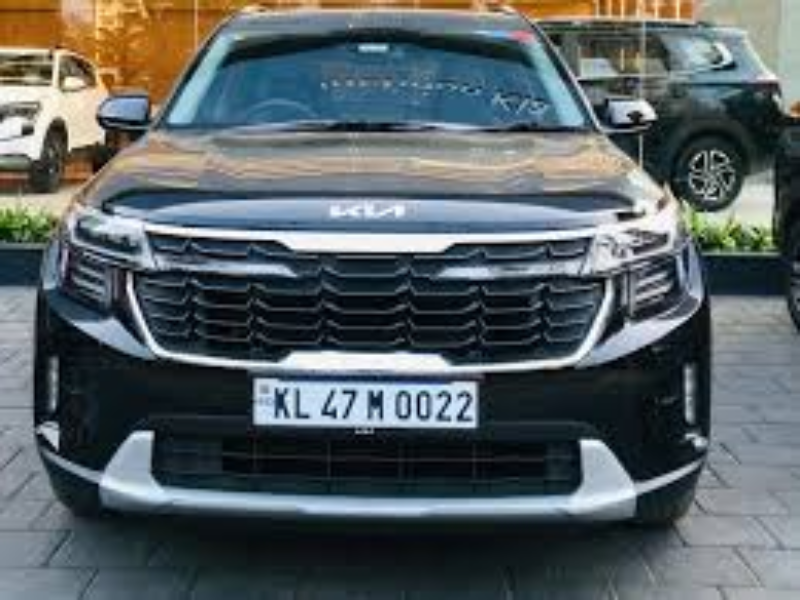

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the image
image = cv2.imread('/content/car', cv2.IMREAD_UNCHANGED)  # Try IMREAD_UNCHANGED
                                                                # or install avif support - see below

# Check if image loaded successfully
if image is None:
    print("Error: Could not load image. Check file path and format.")
else:
    # Resize for consistency
    image = cv2.resize(image, (800, 600))

    cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
    # cv2.waitKey(0)  # Remove this line as it's not needed in Colab
    # cv2.destroyAllWindows()  # Remove this line as it's not needed in Colab

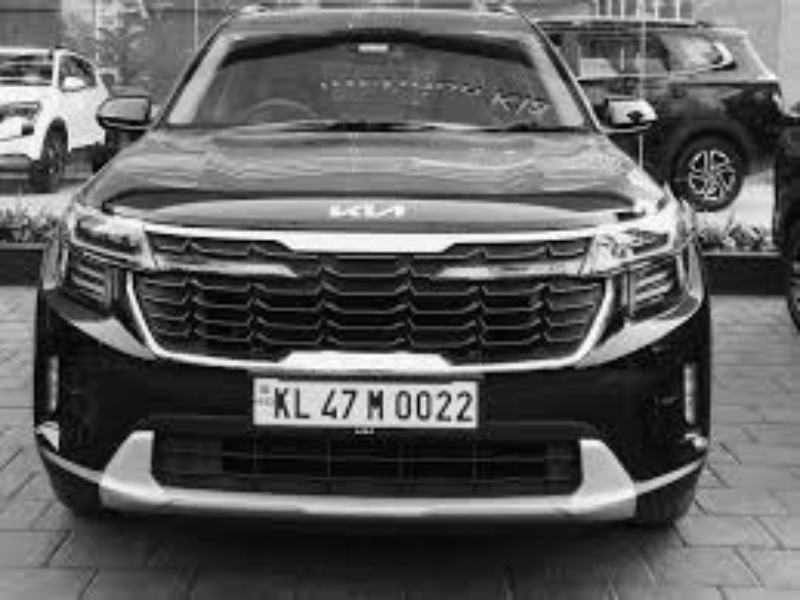

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0)  # Remove this line as it's not needed in Colab
# cv2.destroyAllWindows()  # Remove this line as it's not needed in Colab

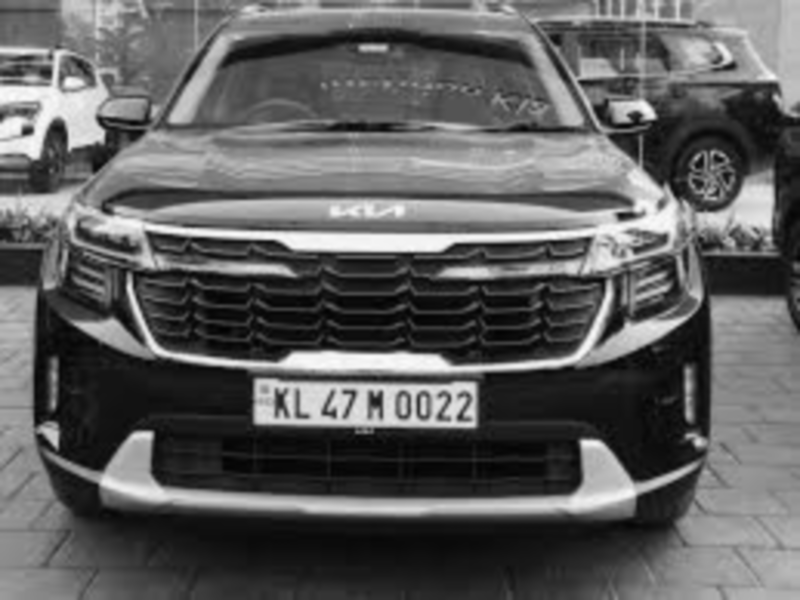

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blurred) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0)  # Remove this line as it's not needed in Colab
# cv2.destroyAllWindows()  # Remove this line as it's not needed in Colab

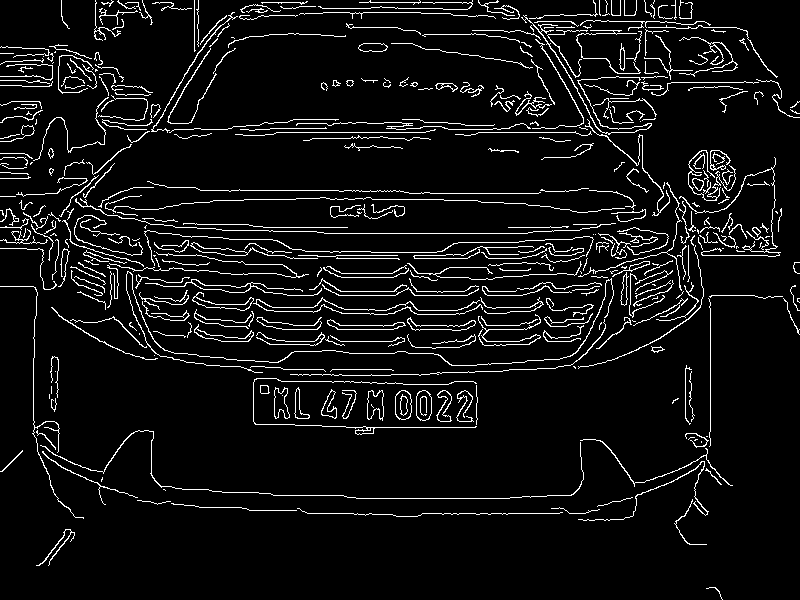

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

edges = cv2.Canny(blurred, 50, 150)
cv2_imshow(edges) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0)  # Remove this line as it's not needed in Colab
# cv2.destroyAllWindows()  # Remove this line as it's not needed in Colab

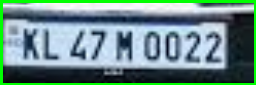

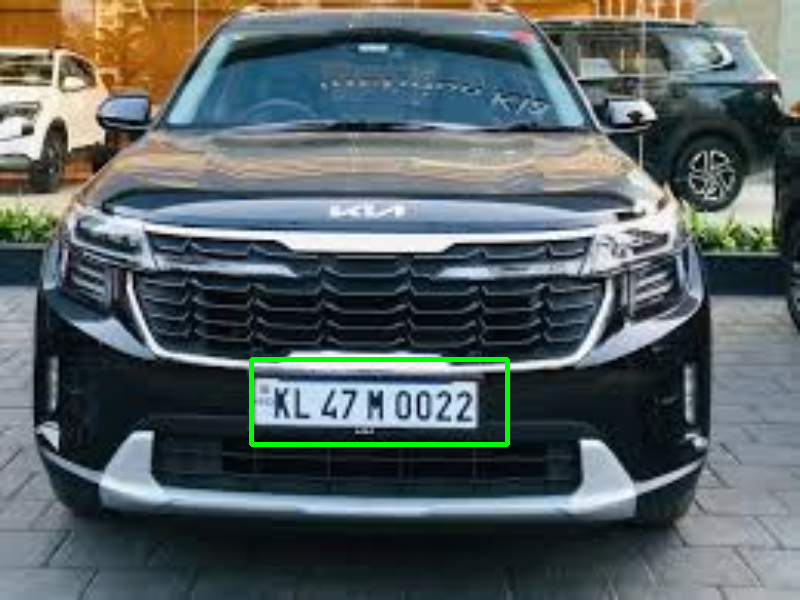

In [18]:
# Load pre-trained Haar cascade for number plates
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

# Detect number plates
plates = plate_cascade.detectMultiScale(morphed, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

# If plates found, draw bounding boxes
if len(plates) > 0:
    for (x, y, w, h) in plates:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        plate_img = image[y:y + h, x:x + w]
        cv2_imshow(plate_img)  # Display detected plate region

cv2_imshow(image)  # Display image with detected plate


In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/car')

# Check if image loaded successfully
if image is None:
    print("Error: Could not load image. Check file path and format.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Locate the potential number plate
    plate_contour = None
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.018 * peri, True)
        if len(approx) == 4:  # Assuming number plate is rectangular
            plate_contour = approx
            break

    # If number plate detected
    if plate_contour is not None:
        # Extract plate region
        x, y, w, h = cv2.boundingRect(plate_contour)
        plate_img = image[y:y+h, x:x+w]

        # Display only the detected number plate
        cv2_imshow(plate_img)

    else:
        print("Number plate not found.")
